		for (int y = 0; y < mapHeight; y++) {
			for (int x = 0; x < mapWidth; x++) {
		
				float amplitude = 1;
				float frequency = 1;
				float noiseHeight = 0;

				for (int i = 0; i < octaves; i++) {
					float sampleX = (x-halfWidth) / scale * frequency + octaveOffsets[i].x;
					float sampleY = (y-halfHeight) / scale * frequency + octaveOffsets[i].y;

					float perlinValue = Mathf.PerlinNoise (sampleX, sampleY) * 2 - 1;
					noiseHeight += perlinValue * amplitude;

					amplitude *= persistance;
					frequency *= lacunarity;
				}

				if (noiseHeight > maxNoiseHeight) {
					maxNoiseHeight = noiseHeight;
				} else if (noiseHeight < minNoiseHeight) {
					minNoiseHeight = noiseHeight;
				}
				noiseMap [x, y] = noiseHeight;
			}
		}

		for (int y = 0; y < mapHeight; y++) {
			for (int x = 0; x < mapWidth; x++) {
				noiseMap [x, y] = Mathf.InverseLerp (minNoiseHeight, maxNoiseHeight, noiseMap [x, y]);
			}
		}

		return noiseMap;
	}

}

In [1]:
import matplotlib.pyplot as plt

In [9]:
from PIL import Image
import random

In [ ]:
def GenerateNoiseMap(mapWidth, mapHeight, seed, scale, octaves, persistance, lacunarity,offset) :
    noiseMap = Image.new(size = (mapWidth,mapHeight), mode = 'RGB')
    random.seed(seed)
    octaveOffsets = []
    for octave in range(octaves):
        offsetX = randint(-100000, 100000) + offset.x
        offsetY = randint(-100000, 100000) + offset.y
        octaveOffsets.append({
            'x':offsetX,
            'y':offsetY
        })
    scale = max(scale, 0.0001)
    maxNoiseHeight = -100000
    minNoiseHeight = 100000

    halfWidth = mapWidth / 2
    halfHeight = mapHeight / 2
    
    for y in range(mapHeight):
        for x in range(mapWidth):
            amplitude = 1
            frequency = 1
            noiseHeight = 0
            for octave in octaveOffsets:
                sampleX = (x-halfWidth) / scale * frequency + octave.x;
                sampleY = (x-halfHeight) / scale * frequency + octave.y;

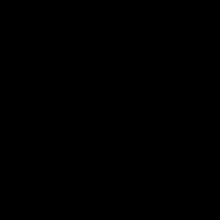

In [8]:
Image.new(size = (220,220), mode = 'RGB')

In [10]:
random.randint(100,1200)

1155

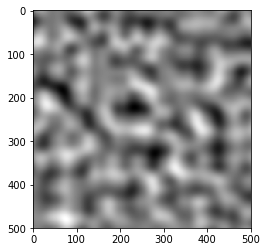

In [16]:
from perlin_noise import PerlinNoise
noise = PerlinNoise(octaves=10, seed=1)
xpix, ypix = 500, 500
pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]

plt.imshow(pic, cmap='gray')
plt.show()